# Customer Churn Prediction for SyriaTel Telecommunication Company
### Objective
Build a classification model to predict customer churn in SyriaTel's Telecommunication company, enabling targeted interventions to retain at-risk customers.

### Purpose
Reduce SyriaTel’s customer churn rate by developing a predictive model that identifies at-risk customers and delivers actionable insights for targeted retention strategies, ultimately lowering acquisition costs and increasing customer lifetime value.

### Approach
Use customer data(e.g, area code, billing information, subcription plan e.t.c) to develop a predictive model through stages of business understanding, data understanding,,preprocessing, modeling, evaluating and lastly deployment.

## Business Understanding
### 1.1 Business Overview
SyriaTel, a leading telecommunication provider in Syria, operates in a highly competitive market where customer retention is critical due to high customer acquisition costs. Customer churn when customers switch to competitors (e.g., MTN Syria) or discontinue services directly erodes revenue and profitability. By leveraging predictive analytics, SyriaTel aims to identify at-risk customers and implement targeted retention strategies, such as tailored promotions, enhanced service offerings, or improved customer support, to maintain loyalty and strengthen its market position in Syria’s telecom sector.

### 1.2 Problem Statement
Customer churn poses a significant challenge for SyriaTel, leading to revenue loss and increased marketing expenses. Without predictive insights, SyriaTel struggles to identify which customers are likely to churn and the underlying reasons, limiting the effectiveness of retention efforts. The problem is to develop a classification model that accurately predicts customer churn based on SyriaTel’s customer data (e.g., usage patterns, plan types, billing, and service interactions), enabling proactive and targeted interventions to reduce churn rates and improve customer retention.

### 1.3 Business Objectives
#### Main Objective
Develop a predictive model to identify SyriaTel customers at high risk of churn. 
#### Specific Objective
1. Identify key factors driving churn at SyriaTel (e.g., high billing charges, frequent customer service calls, lack of international or voicemail plans) to inform service and pricing improvements.
2. Segment at-risk customers (e.g., by plan type, call usage, or tenure) to prioritize retention efforts for high-value groups.
3. Optimize resource allocation for SyriaTel’s marketing and customer service teams by targeting interventions based on churn predictions, reducing costs and improving efficiency.

### 1.4 Research Questions
- What are the primary factors (e.g., high total day charge, frequent customer service calls, or absence of international plan) contributing to customer churn at SyriaTel?
- Which customer segments (e.g., long-tenure vs. short-tenure customers, high vs. low usage, or specific area code regions) are most likely to churn?
- How can SyriaTel use churn predictions to allocate marketing and customer service resources effectively (e.g., offering discounts to high-usage customers or improving support for those with frequent complaints)?

### 1.5 Success Criteria 
Model Performance Metrics:
Achieve high recall (>80%) to ensure most at-risk customers are identified for retention efforts.
Maintain a balanced F1-score (>0.7) and AUC-ROC (>0.8) to ensure robust and reliable predictions.

- Increase customer satisfaction (e.g., through reduced customer service calls or improved feedback) by addressing key churn drivers.



### Data Understanding
We assessed SyriaTel’s customer dataset(from Kaggle open source) to ensure it is relevant, sufficient, and suitable for building a churn prediction model.   
Data description  
Customer Data (Provided):Account Information: account length (tenure in months), area code, phone number, state.      
Service Usage: international plan (yes/no), voice mail plan (yes/no), number vmail messages, total day minutes, total day calls, total eve minutes, total eve calls, total night minutes, total night calls, total intl minutes, total intl calls.        
Billing: total day charge, total eve charge, total night charge, total intl charge.       
Customer Support: customer service calls.      
Target Variable: churn (True/False, indicating whether the customer churned).

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


data = pd.read_csv('syriatel.csv', index_col = 0)
data.head()

,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,,,,,,,,,,,,,,,,,,,,
KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [2]:
data.shape

(3333, 20)

In [3]:
# Inspecting the columnsr
data.columns

Index(['account length', 'area code', 'phone number', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

In [4]:
# Inspecting the dataset
data.dtypes

account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [5]:
# Inspectin the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, KS to TN
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   phone number            3333 non-null   object 
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   float6

In [6]:
# Insecting the dataset
data.describe()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


The dataset has sufficient records to support a robust modeling.
Consists of 3,333 records and 20 columns. 

In [7]:
# Checking for missing valuess
data.isna().sum()

account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

The dataset dosent seem to have any missing values. Quite a smooth start.

### Data Preparation

In [8]:
# Checking for duplicates in our dataset
data.duplicated().sum()

np.int64(0)

We dont seem to have any duplicates in our dataset.

In [9]:
# Logical consistency: Voicemail messages
inconsistent_vmail = data[(data['voice mail plan'] == 'no') & (data['number vmail messages'] > 0)]
print(f"Inconsistent voicemail entries: {len(inconsistent_vmail)}")

Inconsistent voicemail entries: 0


This shows voicemail messages are consistent

In [10]:
# Checking for international pricing 
print(data.groupby('international plan')['total day charge'].mean())

international plan
no     30.412495
yes    31.958390
Name: total day charge, dtype: float64


In [11]:
# Checking for consistency in our dataset
data = data.reset_index()
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [12]:
# Assessing the dataset  
data['international plan'].value_counts()



international plan
no     3010
yes     323
Name: count, dtype: int64

In [13]:
# Checking for format in the dataset
data['phone number'].head()      


0    382-4657
1    371-7191
2    358-1921
3    375-9999
4    330-6626
Name: phone number, dtype: object

In [14]:
# Assessing dataset
data['voice mail plan'].value_counts()

voice mail plan
no     2411
yes     922
Name: count, dtype: int64

In [15]:
# Assessing whether state would be useful in our prediction 
data.groupby("state")["churn"].mean().sort_values()


state
HI    0.056604
AK    0.057692
AZ    0.062500
VA    0.064935
IA    0.068182
LA    0.078431
NE    0.081967
IL    0.086207
WI    0.089744
RI    0.092308
DC    0.092593
TN    0.094340
WV    0.094340
NM    0.096774
ND    0.096774
AL    0.100000
VT    0.109589
MO    0.111111
WY    0.116883
ID    0.123288
IN    0.126761
FL    0.126984
OH    0.128205
SD    0.133333
KY    0.135593
CO    0.136364
UT    0.138889
OR    0.141026
OK    0.147541
DE    0.147541
GA    0.148148
NH    0.160714
NC    0.161765
CT    0.162162
MA    0.169231
PA    0.177778
MN    0.178571
NY    0.180723
KS    0.185714
AR    0.200000
MT    0.205882
ME    0.209677
WA    0.212121
NV    0.212121
MS    0.215385
MI    0.219178
SC    0.233333
MD    0.242857
TX    0.250000
NJ    0.264706
CA    0.264706
Name: churn, dtype: float64

In [34]:
# Dealing with categorical columns
cols_to_convert=['international plan','voice mail plan']
df[cols_to_convert]=df[cols_to_convert].replace({'yes':1, 'no':0})
df.head(2)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,churn_num
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.7,1,0,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.7,1,0,0


#### Summary
The dataset is clean and ready for preprocessig.

### Exploratory Data Analysis

In [ ]:
# Make sure target is 0/1
data['churn'].astype(int)

df = data.copy()

df['churn_num'] = df['churn'].astype(int)

# identifying the baseline for churning
baseline = df['churn_num'].mean()
print(f"Baseline churn rate: {baseline:.2%}  (n={len(df)})")

# categorical signals risk ratios
def churn_rate_by(cat):
    out = (df.groupby(cat)['churn_num']
             .agg(['mean','count'])
             .rename(columns={'mean':'churn_rate','count':'n'})
             .sort_values('churn_rate', ascending=False))
    return out

def risk_ratio(cat, positive_value):
    # RR = churn_rate(positive) / churn_rate(negative)
    a = df.loc[df[cat]==positive_value, 'churn_num'].mean()
    b = df.loc[df[cat]!=positive_value, 'churn_num'].mean()
    return a/b if b>0 else np.nan


Baseline churn rate: 14.49%  (n=3333)


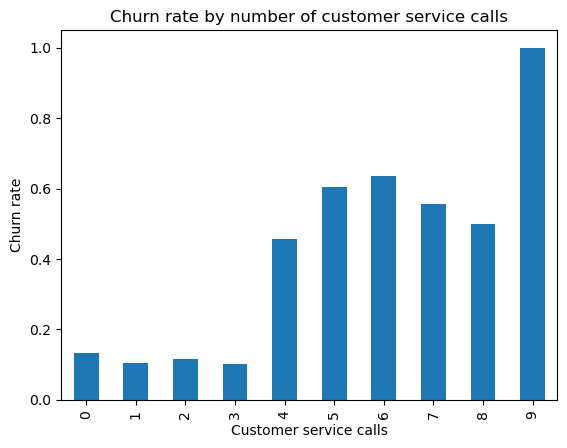

In [18]:
 # Visualization churn rate by number of customer service calls
calls_tbl = (df.groupby('customer service calls')['churn_num']
               .mean()
               .rename('churn_rate'))
ax = calls_tbl.plot(kind='bar')
ax.set_title('Churn rate by number of customer service calls')
ax.set_ylabel('Churn rate')
ax.set_xlabel('Customer service calls')
plt.show()

From the above its evident that frequent customer service calls increases the rate of churning. 9 in this case is the most service called and its leading with churn rate. Here, the a precaution should be taken to fix the underlying issue related to that section of the organization, to avoid frequent calls from customers reporting an issue with the service.

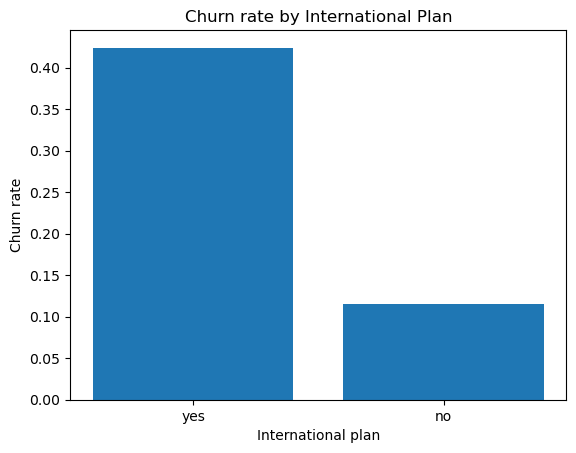

In [19]:
#  Visualization churn rate by International Plan
intl_tbl = churn_rate_by('international plan').reset_index()
ax = plt.figure().gca()
ax.bar(intl_tbl['international plan'].astype(str), intl_tbl['churn_rate'])
ax.set_title('Churn rate by International Plan')
ax.set_ylabel('Churn rate'); ax.set_xlabel('International plan')
plt.show()

The above shows that customers with an international plan seem to churn more as compared to those without the plan. So there is a likelyhood of an underlying issue in terms of strategic planning. The company should devise a way to on how to handle international plan without losing customers.

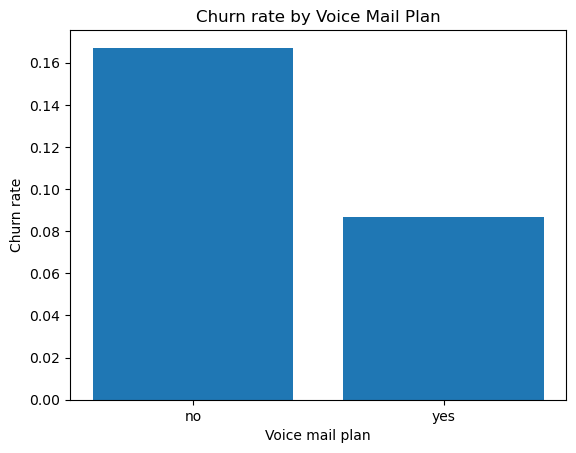

In [20]:
# Visualization churn rate by Voice Mail Plan
vm_tbl = churn_rate_by('voice mail plan').reset_index()
ax = plt.figure().gca()
ax.bar(vm_tbl['voice mail plan'].astype(str), vm_tbl['churn_rate'])
ax.set_title('Churn rate by Voice Mail Plan')
ax.set_ylabel('Churn rate'); ax.set_xlabel('Voice mail plan')
plt.show()

The observation made from the above clearly shows that customers with no Voice mail plan churn more compared to those with the plan. In this case, its advisable for the company to invest on the plan to avoid this behavior in the future.

/tmp/ipykernel_19316/4055975930.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tbl = df.groupby(b)['churn_num'].mean()
/tmp/ipykernel_19316/4055975930.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tbl = df.groupby(b)['churn_num'].mean()


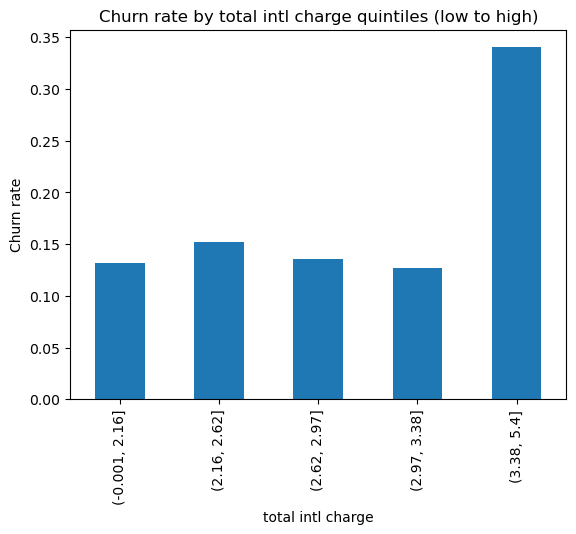

In [21]:
# are high charges linked to churn? (bining by quintiles)
def plot_binned_churn(col, q=5):
    b = pd.qcut(df[col], q=q, duplicates='drop')
    tbl = df.groupby(b)['churn_num'].mean()
    ax = tbl.plot(kind='bar')
    ax.set_title(f'Churn rate by {col} quintiles (low to high)')
    ax.set_ylabel('Churn rate'); ax.set_xlabel(col)
    return tbl

bins_day = plot_binned_churn('total day charge', q=5)
bins_intl = plot_binned_churn('total intl charge', q=5)

The above shows that high bailing charges increases the chances of customer churning. The 5th quintile has the highest charges and hence the high rate of churning. The company should consider moderating their charges to range from low to medium.

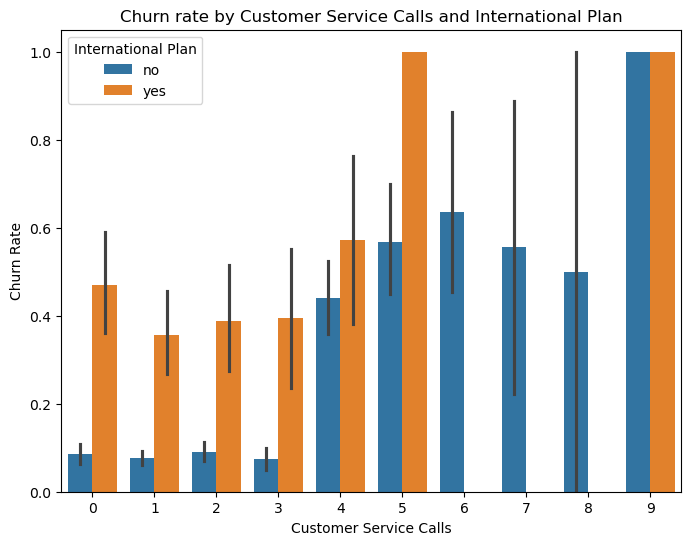

In [22]:

plt.figure(figsize=(8,6))
sns.barplot(
    data=df,
    x="customer service calls",
    y="churn_num",
    hue="international plan",
    estimator="mean"
)
plt.title("Churn rate by Customer Service Calls and International Plan")
plt.ylabel("Churn Rate")
plt.xlabel("Customer Service Calls")
plt.legend(title="International Plan")
plt.show()

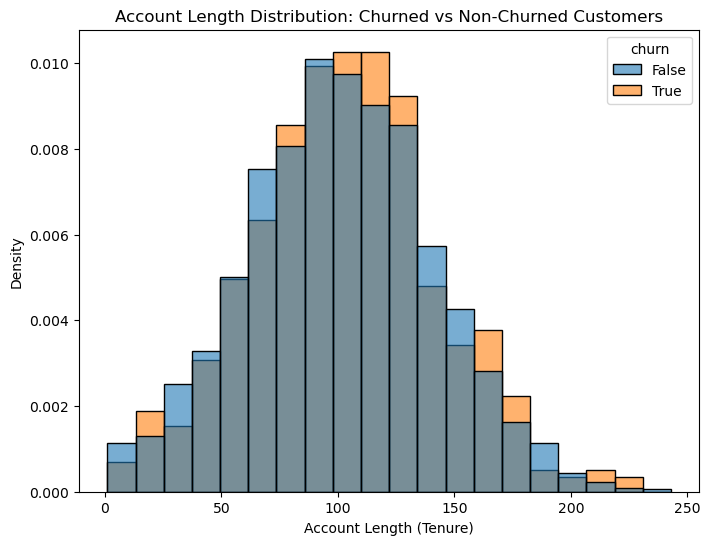

In [23]:
plt.figure(figsize=(8,6))
sns.histplot(
    data=df,
    x="account length",
    hue="churn",
    stat="density",
    common_norm=False,
    bins=20,
    alpha=0.6
)
plt.title("Account Length Distribution: Churned vs Non-Churned Customers")
plt.xlabel("Account Length (Tenure)")
plt.ylabel("Density")
plt.show()


This shows normal distribution of churning and not churning across account length. This indicates that account lenth is not a factor, rather syriatel can focus on other contributing factors to customer churn.

Below is a random forest for predicting the churn. It helps us with plotting the future importance. This tells management why those groups churn, so interventions can be justified.

/tmp/ipykernel_19316/2399354208.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances, x='importance', y='feature', palette='viridis')


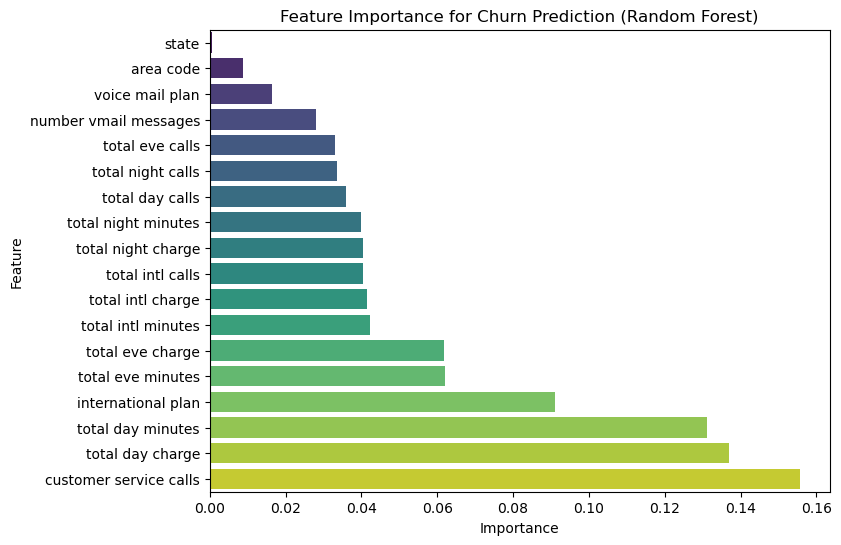

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

# Copy dataset
X = df.drop(columns=['churn','churn_num','phone number','account length'])
y = df['churn_num']

# Encode categorical features
X = X.copy()
for col in X.select_dtypes(include='object').columns:
    ohe = OneHotEncoder(sparse_output=False, drop='first')
    X[col] = ohe.fit_transform(X[[col]])

# Train Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf.fit(X, y)

# Feature importance
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=True)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(data=importances, x='importance', y='feature', palette='viridis')
plt.title("Feature Importance for Churn Prediction (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


Customer service performance is the strongest churn signal - improving this can directly reduce churn.

High-usage customers (especially daytime callers) are at risk - need targeted retention offers.

International plan users are sensitive - better international packages could keep them loyal.

Voicemail and state-level differences don’t matter much - no need to allocate marketing budget here.

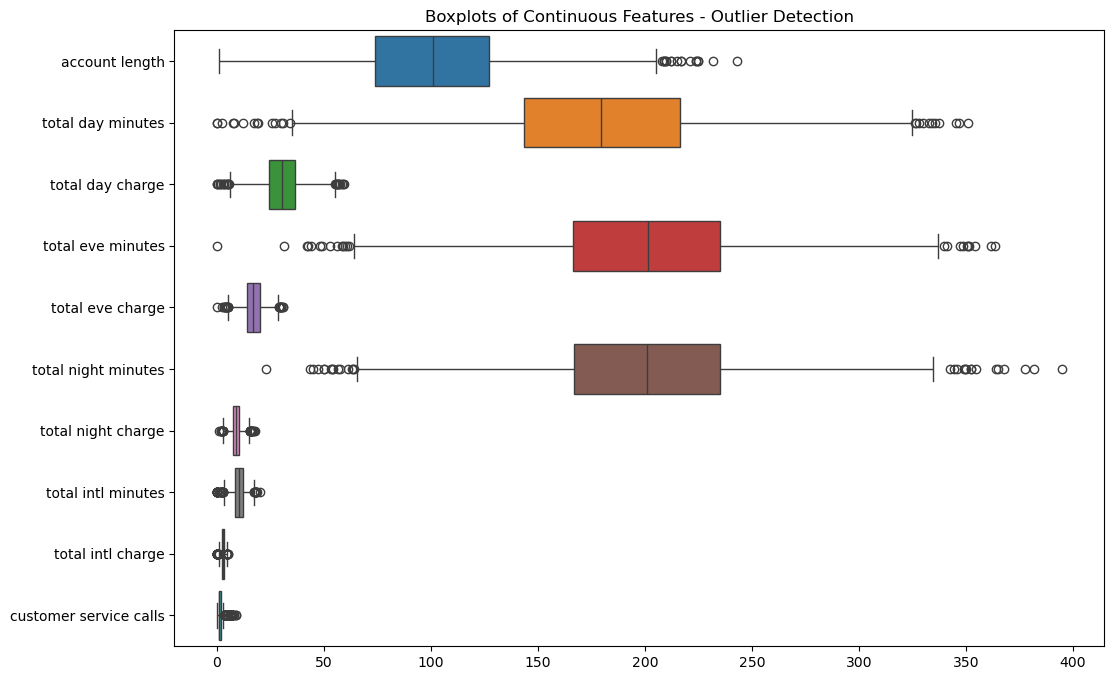

In [27]:
cont_vars = ['account length','total day minutes','total day charge',
             'total eve minutes','total eve charge',
             'total night minutes','total night charge',
             'total intl minutes','total intl charge',
             'customer service calls']

plt.figure(figsize=(12,8))
sns.boxplot(data=df[cont_vars], orient="h")
plt.title("Boxplots of Continuous Features - Outlier Detection")
plt.show()


Validating the outliers.
Deciding to keep the outliers since they might have valuable insight. We'll be applying log tranformation to reduce the effect.

In [ ]:

# ========= STEP 5 (optional quick check): tiny interpretable tree for interactions =========
# If scikit-learn is available, uncomment to see a simple, human-size tree.
# from sklearn.tree import DecisionTreeClassifier, plot_tree
# X = df[num_cols + cat_cols].copy()
# # Encode the 2 categorical plans as 0/1
# for c in cat_cols:
#     X[c] = (X[c].astype(str).str.lower().isin(['yes','true'])).astype(int)
# clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=50, class_weight='balanced', random_state=0)
# clf.fit(X, y)
# plt.figure(figsize=(14,6))
# plot_tree(clf, feature_names=X.columns, class_names=['No churn','Churn'], filled=True, impurity=False)
# plt.show()

##### Assumptions check

In [ ]:
# Assessing whether the target has a binary outcome
df['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

In [30]:
# Converting target variable to int
df['churn']=df['churn'].astype(int)
df.head(2)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,churn_num
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.7,1,0,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.7,1,0,0


Our target is a binary outcome

In [36]:
# Assessing independence of observation
df['phone number'].nunique(),df.shape[0]

(3333, 3333)

This means each row is unique since all the phone numbers were unique

In [38]:
# Assessing linearity of the logit for continuous predictors
import statsmodels.api as sm

# Select continuous features
cont_vars = ['account length','total day minutes','total eve minutes',
             'total night minutes','total intl minutes','customer service calls']

# Add interaction term with log(variable)
for var in cont_vars:
    df[var+'_log'] = df[var] * np.log(df[var] + 1)

# Fit model with interaction terms
X = sm.add_constant(df[cont_vars + [v+"_log" for v in cont_vars]])
y = df['churn_num']

model = sm.Logit(y, X).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.333545
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              churn_num   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3320
Method:                           MLE   Df Model:                           12
Date:                Wed, 10 Sep 2025   Pseudo R-squ.:                  0.1939
Time:                        06:17:32   Log-Likelihood:                -1111.7
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                8.260e-107
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.5122      1.943     -0.778      0.436      

The logit tranformation has mixed oversights most variables are better without the transformation. However, total day minutes and customer service calls show a significant improvement indicating that the two need to be tranformed to improve the results of the final model.

In [43]:
df.head(2)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total intl charge,customer service calls,churn,churn_num,account length_log,total day minutes_log,total eve minutes_log,total night minutes_log,total intl minutes_log,customer service calls_log
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,2.7,1,0,0,622.055988,1480.284514,1044.302297,1346.856030,23.978953,0.693147
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,3.7,1,0,0,500.988041,822.752981,1032.369505,1410.096192,36.823511,0.693147


In [44]:
# checking for multicolinearlity
from statsmodels.stats.outliers_influence import variance_inflation_factor
cont_var = ['account length','total day minutes_log','total eve minutes',
             'total night minutes','total intl minutes','customer service calls_log']
X = df[cont_var] 
X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


                      feature        VIF
0                       const  62.496525
1              account length   1.000261
2       total day minutes_log   1.000359
3           total eve minutes   1.000530
4         total night minutes   1.000545
5          total intl minutes   1.000570
6  customer service calls_log   1.000382


From the above no multicolinearity is observed from our feature variables.

In [45]:
# Checking for convergence
model = sm.Logit(y, sm.add_constant(X)).fit()


Optimization terminated successfully.
         Current function value: 0.353937
         Iterations 7


This means our model coverges correctly as it should. No predictors that do too well at prediction. Hence, all our predictors are fit for our final model.

###